In [1]:
import sys
sys.path.append('..')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.core.display import HTML
from sklearn.tree import export_text
import graphviz
from custom_lib import lib

%matplotlib inline 
sns.set(style="ticks")

In [2]:
data_drugs = pd.read_csv("./drugs_class.csv", sep=',')
data_drugs.head()

Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY

In [3]:
data_drugs.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [4]:
data_drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
data_drugs.describe()

Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000

In [6]:
for feature in ["Sex", "BP", "Cholesterol", "Drug"]:
    print(feature, ": ", data_drugs[feature].unique())

Sex :  ['F' 'M']
BP :  ['HIGH' 'LOW' 'NORMAL']
Cholesterol :  ['HIGH' 'NORMAL']
Drug :  ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [7]:
data_drugs_enc = data_drugs.copy()

In [8]:
le = LabelEncoder()

le.fit(data_drugs["Drug"])
data_drugs_enc["Drug"] = le.transform(data_drugs["Drug"])

le.fit(data_drugs["Sex"])
data_drugs_enc["Sex"] = le.transform(data_drugs["Sex"])

data_drugs_enc.head()

Age  Sex      BP Cholesterol  Na_to_K  Drug
0   23    0    HIGH        HIGH   25.355     0
1   47    1     LOW        HIGH   13.093     3
2   47    1     LOW        HIGH   10.114     3
3   28    0  NORMAL        HIGH    7.798     4
4   61    0     LOW        HIGH   18.043     0

In [9]:
oe = OrdinalEncoder()

oe.fit(data_drugs.drop(["Age", "Sex", "Na_to_K", "Drug"], axis=1))

features_enc = oe.transform(data_drugs.drop(["Age", "Sex", "Na_to_K", "Drug"], axis=1))

features_enc_df = pd.DataFrame(features_enc, columns=['BP', 'Cholesterol'])

data_drugs_enc = data_drugs_enc.drop(["BP", "Cholesterol"], axis=1)

data_drugs_enc = pd.concat([data_drugs_enc, features_enc_df], axis=1)

In [10]:
# ohe_bp, ohe_chol = OneHotEncoder(), OneHotEncoder()

# ohe_bp.fit(data_drugs[["BP"]])
# data_drugs_enc_BP = ohe_bp.transform(data_drugs[["BP"]]).toarray()
# data_drugs_enc_BP_df = pd.DataFrame(data_drugs_enc_BP, columns="BP_"+ohe_bp.categories_[0])

# ohe_chol.fit(data_drugs[["Cholesterol"]])
# data_drugs_enc_Cholesterol = ohe_chol.transform(data_drugs[["Cholesterol"]]).toarray()
# data_drugs_enc_Cholesterol_df = pd.DataFrame(data_drugs_enc_Cholesterol, columns="Chol_" + ohe_chol.categories_[0])

# data_drugs_enc = pd.concat([data_drugs_enc.iloc[:, :3], data_drugs_enc_BP_df, data_drugs_enc_Cholesterol_df, data_drugs_enc.iloc[:, 3:]], axis=1)
# data_drugs_enc.drop(["BP", "Cholesterol"], axis=1, inplace=True)


In [11]:
data_drugs_enc.head()

Age  Sex  Na_to_K  Drug   BP  Cholesterol
0   23    0   25.355     0  0.0          0.0
1   47    1   13.093     3  1.0          0.0
2   47    1   10.114     3  1.0          0.0
3   28    0    7.798     4  2.0          0.0
4   61    0   18.043     0  1.0          0.0

In [12]:
corr = data_drugs_enc.corr()

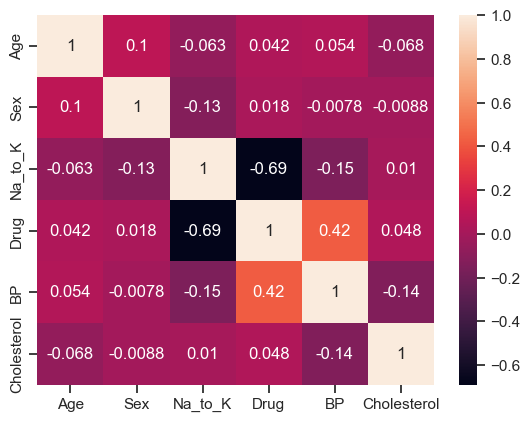

In [13]:
heatmap = sns.heatmap(corr, annot=True)

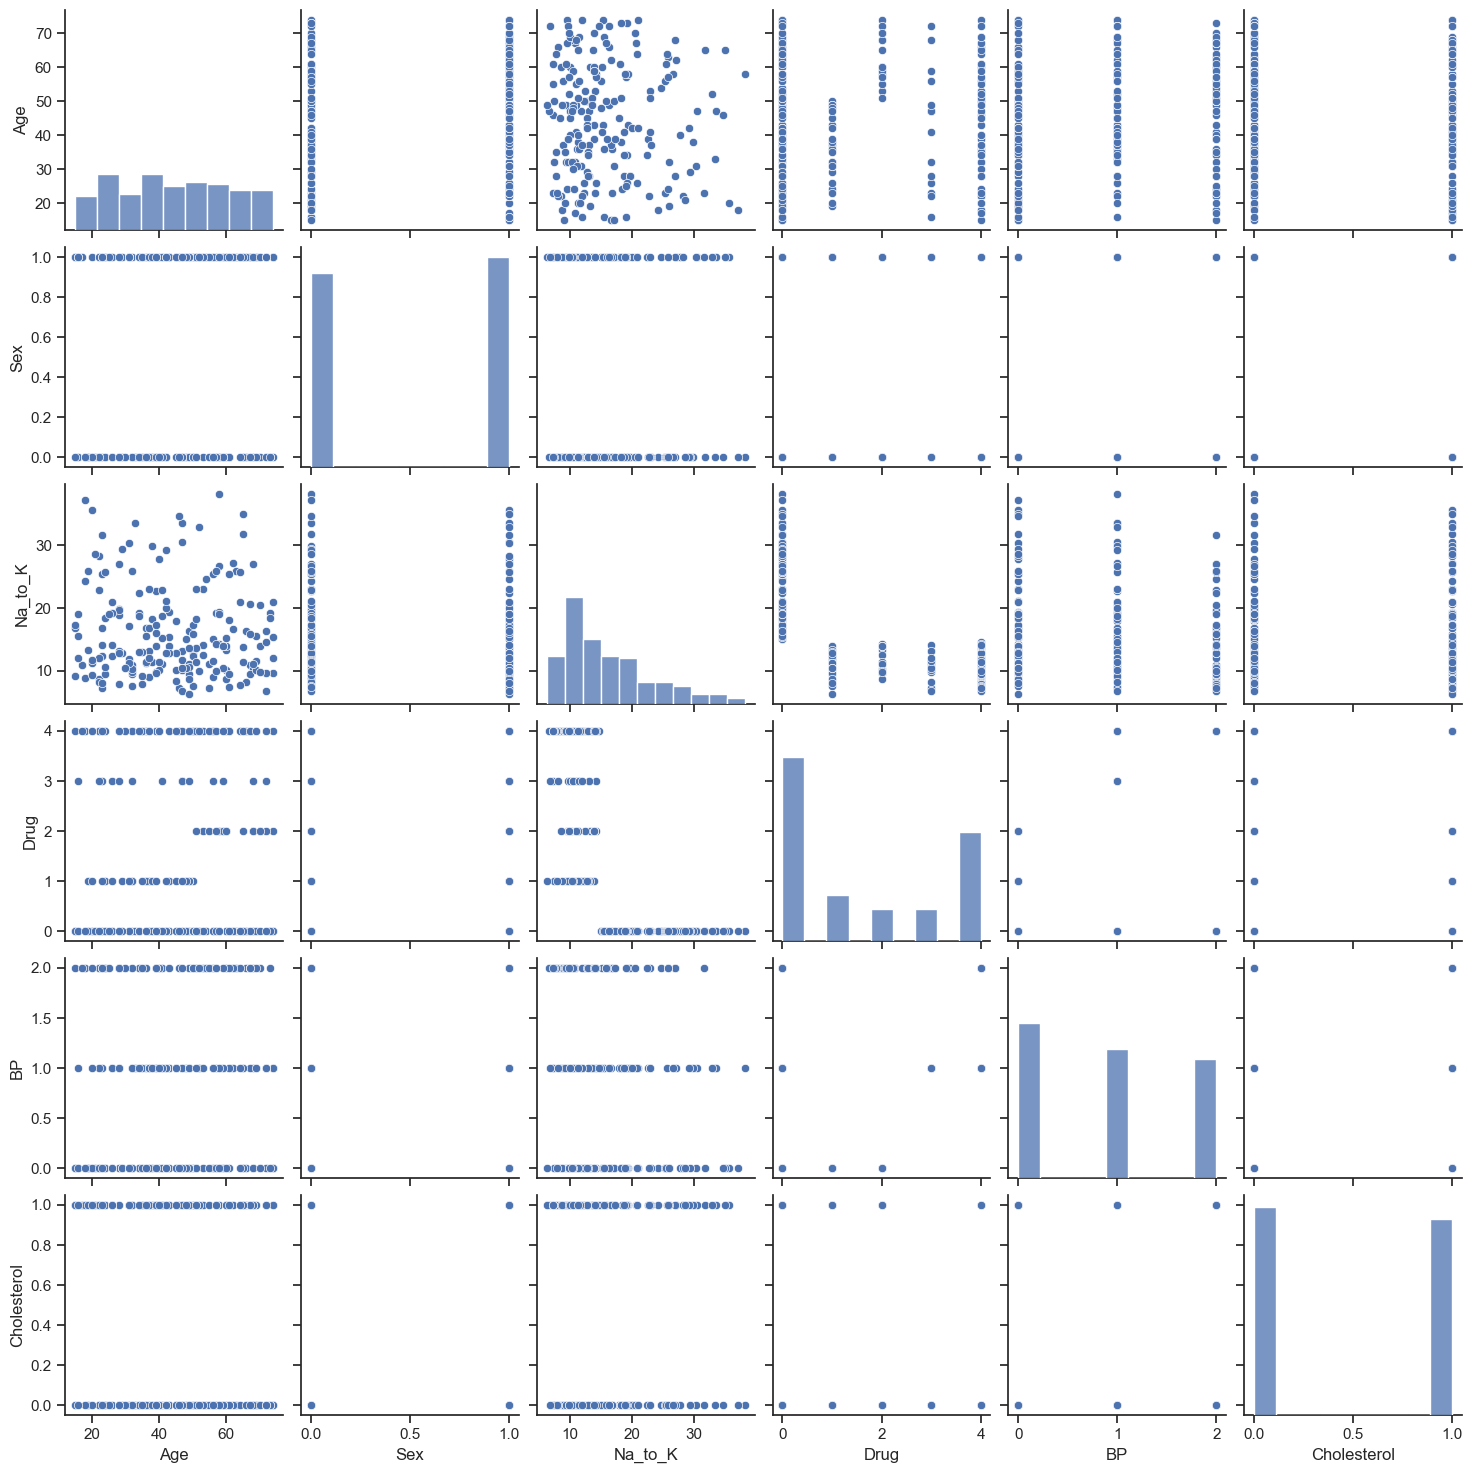

In [14]:
sns.pairplot(data=data_drugs_enc)

In [15]:
data_X = data_drugs_enc.drop("Drug", axis=1)
data_y = data_drugs_enc["Drug"]

In [16]:
lib.print_class_proportions(data_y)

Метка 	 Количество 	 Процент встречаемости
0 	 91 	 	 45.5%
1 	 23 	 	 11.5%
2 	 16 	 	 8.0%
3 	 16 	 	 8.0%
4 	 54 	 	 27.0%


In [17]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=1, stratify=data_y)

1. Логистическая регрессия

In [18]:
log_reg = LogisticRegression(multi_class="multinomial", class_weight="balanced", 
                             penalty='l2', C=1.0, max_iter=10000)

In [19]:
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000,
                   multi_class='multinomial')

In [20]:
reg_pred = log_reg.predict(X_test)

In [21]:
reg_pred

array([2, 0, 4, 0, 4, 3, 4, 4, 2, 0, 0, 0, 4, 2, 1, 0, 0, 2, 1, 3, 0, 3,
       0, 4, 0, 4, 0, 0, 0, 4, 1, 0, 0, 1, 4, 0, 4, 0, 1, 0])

In [22]:
accuracy_score(y_test, reg_pred)

0.975

In [23]:
lib.print_accuracy_score_for_classes(y_test, reg_pred)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 1.0
3 	 1.0
4 	 0.9090909090909091


In [24]:
confusion_matrix(y_test, reg_pred)

array([[18,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 0,  0,  1,  0, 10]], dtype=int64)

In [25]:
lib.test_model(log_reg, y_test, X_test)

mean_absolute_error: 0.05
median_absolute_error: 0.0
r2_score: 0.9659863945578231


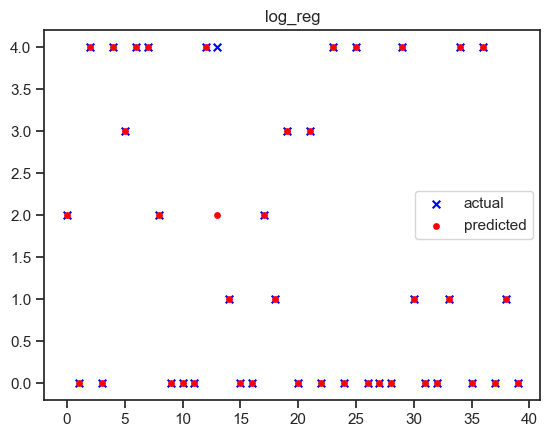

In [26]:
lib.actual_predicted_scatter(y_test, reg_pred, "log_reg")

2. Метод опорных векторов

In [27]:
from sklearn.svm import SVC

svc = SVC(kernel="rbf")

In [28]:
param_grid = {'C':[10, 100, 1000, 1e4, 1e5, 1e6]}
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(data_X, data_y)
grid_search.best_params_

{'C': 1000}

In [29]:
svc = SVC(kernel="rbf", C=1000)

In [30]:
svc.fit(X_train, y_train)

SVC(C=1000)

In [31]:
svc_pred = svc.predict(X_test)

In [32]:
lib.print_accuracy_score_for_classes(y_test, svc_pred)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 1.0
3 	 1.0
4 	 1.0


In [41]:
lib.test_model(svc, y_test, X_test)

mean_absolute_error: 0.0
median_absolute_error: 0.0
r2_score: 1.0


In [33]:
confusion_matrix(y_test, svc_pred)

array([[18,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 0,  0,  0,  0, 11]], dtype=int64)

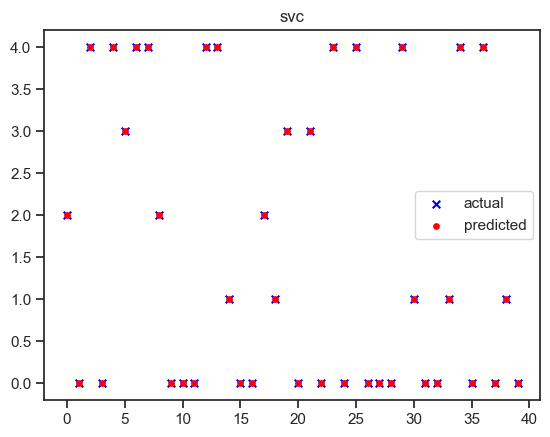

In [34]:
lib.actual_predicted_scatter(y_test, svc_pred, 'svc')

3. Дерево решений

In [35]:
tree_cl = DecisionTreeClassifier(random_state=1)

In [36]:
tree_cl.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [37]:
tree_pred = tree_cl.predict(X_test)

In [38]:
lib.print_accuracy_score_for_classes(y_test, tree_pred)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 1.0
3 	 1.0
4 	 0.9090909090909091


In [42]:
lib.test_model(tree_cl, y_test, X_test)

mean_absolute_error: 0.1
median_absolute_error: 0.0
r2_score: 0.8639455782312926


In [43]:
confusion_matrix(y_test, tree_pred)

array([[18,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 1,  0,  0,  0, 10]], dtype=int64)

In [39]:
tree_rules = export_text(tree_cl, feature_names=list(data_X.columns))
HTML('<pre>' + tree_rules + '</pre>')

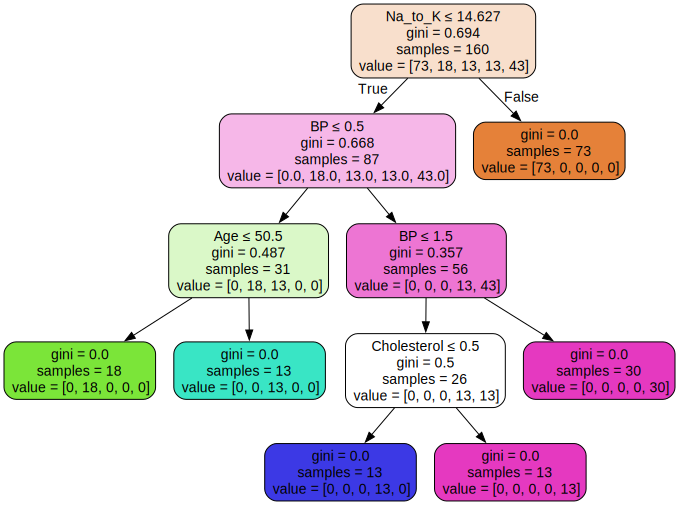

In [40]:
dot_data = export_graphviz(tree_cl, out_file=None, 
                           feature_names=list(data_X.columns),
                           filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)
graph